# 🍽️ iFood — Intelligent Segmentation and Campaign Response Analysis



## Overview

This project analyzes the **effectiveness of promotional campaigns in a premium retail context at iFood**, using an **adapted dataset** for analytical purposes. The scenario involves multiple campaigns with distinct strategies and a rich dataset containing **demographic, behavioral, and consumption** information.

The goal is to turn heterogeneous campaign results into **reliable business decisions**, supporting the evolution of a data-driven marketing strategy focused on performance, efficiency, and risk reduction.



## Project Objectives

- Evaluate **customer response** to different promotional strategies  
- Compare campaign performance through **controlled (A/B) tests**  
- Define criteria for **evidence-based decision making**  
- Support campaign planning with a focus on **impact and return on investment**



## Analytical Approach

The project includes the following steps:

- Exploration and preparation of customer data  
- Analysis of customer profiles, purchasing behavior, and campaign history  
- Comparison of test groups and performance evaluation across approaches  
- Definition of metrics, hypotheses, and decision criteria  
- Interpretation of results with a focus on **business implications**



## Data

The dataset includes variables such as **income, household composition, recency, spending by category, purchase channels, website visits, campaign acceptance history**, as well as demographic and customer relationship attributes. It also includes the identification of **test groups** for experimentation.


## Expected Outcome

To build a **clear and reproducible framework** for evaluating campaigns with analytical rigor and turning data into **actionable recommendations**, supporting marketing decisions focused on **performance, risk, and investment efficiency**.

---


## 🔧 Setup and Import
Initial environment setup

In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
pd.set_option('display.max_columns', None)   # configure pandas to show ALL columns in display
pd.set_option('display.width', None)         # prevent awkward line wrapping
pd.set_option('display.max_colwidth', None)  # do not truncate column names/text

## Load dataset

In [4]:
# Load raw dataset
df = pd.read_excel("../data/ifood_raw.xlsx")

# Quick sanity check
display(df.tail())

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Grupo
2200,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0,A
2201,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,1,0,0,0,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1,B
2202,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1,B
2203,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0,B
2204,52869,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1,66,2781,0,1,0,0,0,0,0,0,0,1,151,130,0,A


# Exploratory Data Analysis

The dataset contains 2,205 observations, each representing a customer. No missing values were identified, indicating that the data quality is adequate for analysis without the need for additional imputation or cleaning at this stage.

The dataset includes several variables related to customer behavior, such as the number of products purchased and whether the customer has previously accepted promotional offers. However, for the purpose of this case, the analysis will focus primarily on the "Group" variable, which indicates the type of marketing campaign to which the customer was exposed (Group A or Group B).

The "AcceptedCmpOverall" variable represents the outcome of the marketing campaign, showing whether the customer accepted the offer or not. It is important to note that this variable will not be used during the statistical inference process, as it represents the final outcome and would introduce data leakage if included in the hypothesis testing phase. This column is retained in the dataset solely for validation and comparison purposes after the analysis is completed.

## Sample Size Estimation for Campaign Experiment

With the Exploratory Data Analysis (EDA) concluded, the next step is to estimate the **minimum number of customers** required to run a marketing campaign experiment whose results can be **statistically inferred to the entire customer population**.

The estimation will be performed in **two steps**, following standard statistical practice.

---

### Step 1 — Sample Size for Infinite Population

As a first approximation, the population is considered **infinite**, which allows the use of a simplified formula to estimate the ideal sample size based solely on the desired margin of error.

The formula used is:

$$
n_0 = \frac{1}{\varepsilon^2}
$$

Where:
- \( n_0 \) = initial sample size (infinite population assumption)
- \( \varepsilon \) = margin of error

This step provides a **baseline sample size**, which will later be adjusted to reflect the real population size.

---

In [5]:
# Margin of error (5%)
epsilon = 0.05

# Sample size for infinite population (rounded up)
n_0 = math.ceil(1 / (epsilon ** 2))

# Population size
population_size = df.shape[0]

# Display
print("population_size = {}".format(population_size))
print("n_0 (initial sample size) = {}".format(n_0))

population_size = 2205
n_0 (initial sample size) = 400


---

## Step 2 — Sample Size Adjustment for Finite Population

Since the actual customer base is **finite**, the initial sample size estimated under the infinite population assumption must be adjusted.

This correction avoids overestimating the number of customers required for the experiment and ensures that the sample size properly reflects the real population size.

The formula used for finite population correction is:

$$
n = \frac{n_0}{1 + \frac{n_0 - 1}{N}}
$$

Where:
- \( n \) = adjusted sample size (finite population)
- \( n_0 \) = initial sample size (infinite population assumption)
- \( N \) = total population size

This step produces the **final required sample size** to be used in the campaign experiment.

In [6]:
# Finite population correction (rounded up)
n = math.ceil(
    n_0 / (1 + (n_0 - 1) / population_size)
)

# Display
print("population_size = {}".format(population_size))
print("n_0 (initial sample size) = {}".format(n_0))
print("n (finite population adjusted sample size) = {}".format(n))

population_size = 2205
n_0 (initial sample size) = 400
n (finite population adjusted sample size) = 339


## Sample Selection for Campaign Experiment

Based on the estimated required sample size, a random subset of customers is selected to simulate the group that will receive the marketing campaign.

A new column, **Sample_Customer**, is created to indicate whether a customer was selected for the experiment:
- `1` → customer selected for the campaign sample
- `0` → customer not selected

The selection is performed randomly and without replacement to ensure unbiased sampling and proper statistical inference.


In [7]:
# ---------------------------------------------
# Sample selection for campaign experiment
# ---------------------------------------------

# Define sample size based on previous estimation
sample_size = 339

# Total population size
population_size = df.shape[0]

# Set random seed for reproducibility
np.random.seed(1)

# Randomly select indices for the sample
sample_indices = np.random.choice(
    df.index,
    size=sample_size,
    replace=False
)

# Initialize the Sample_Customer column with 0 (not selected)
df["Sample_Customer"] = 0

# Mark selected customers as part of the sample
df.loc[sample_indices, "Sample_Customer"] = 1

# Quick validation
df["Sample_Customer"].value_counts()


Sample_Customer
0    1866
1     339
Name: count, dtype: int64

## Sample Conversion Rate

After selecting the sample of customers for the campaign experiment, the campaign outcome is evaluated within this group.
A customer is considered **converted** if the value of **AcceptedCmpOverall** is different from zero, indicating that at least one campaign offer was accepted.
Based on this definition, the conversion rate is calculated as the proportion of converted customers within the sampled population.


In [8]:
# ---------------------------------------------
# Conversion rate calculation for the sample
# ---------------------------------------------

# Filter only sampled customers (explicit copy to avoid chained assignment)
sample_df = df[df["Sample_Customer"] == 1].copy()

# Create a binary conversion flag
sample_df["Converted"] = (sample_df["AcceptedCmpOverall"] != 0).astype(int)

# Calculate conversion rate
conversion_rate = sample_df["Converted"].mean()

# Display results
print("Sample size: {}".format(len(sample_df)))
print("Sample conversion rate: {:.4f} ({:.2%})".format(conversion_rate, conversion_rate))

Sample size: 339
Sample conversion rate: 0.2094 (20.94%)


## Initial Confidence Interval Estimation

To provide an initial understanding of the uncertainty associated with the observed conversion rate, a simple confidence interval is constructed assuming a fixed margin of error of ±5%.

This preliminary interval offers an intuitive range for the expected population conversion rate, before applying a more rigorous statistical approach based on standard error and normal approximation.


In [9]:
# ---------------------------------------------
# Simple confidence interval (± 5%)
# ---------------------------------------------

# Assumed margin of error
margin_error = 0.05

# Confidence interval bounds
ci_lower = conversion_rate - margin_error
ci_upper = conversion_rate + margin_error

# Ensure bounds are within [0, 1]
ci_lower = max(0, ci_lower)
ci_upper = min(1, ci_upper)

# Display results
print("Sample conversion rate: {:.2%}".format(conversion_rate))
print("Confidence Interval (±5%): [{:.2%}, {:.2%}]".format(ci_lower, ci_upper))

Sample conversion rate: 20.94%
Confidence Interval (±5%): [15.94%, 25.94%]


## Statistical Confidence Interval for Conversion Rate

The initial confidence interval previously calculated using a fixed ±5% margin of error represents a **conservative scenario**, which assumes the maximum possible variability of a proportion (i.e., when the conversion rate is close to 50%).

Now that the observed conversion rate has been estimated from the sample, it is possible to compute a **more realistic and statistically grounded confidence interval**. This refined interval accounts for the actual variability observed in the data and therefore provides a more precise range for inferring the population conversion rate.

The confidence interval for a population proportion is defined as:

$$
CI = \hat{p} \pm z \cdot SE
$$

Where:
- \( \hat{p} \) is the observed sample proportion
- \( z \) is the critical value from the standard normal distribution
- \( SE \) is the standard error of the proportion


### Step 1 — Standard Error Calculation

The **standard error (SE)** measures the expected variability of the sample proportion due to random sampling.

It is computed as:

$$
SE = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$

Where:
- \( \hat{p} \) is the observed conversion rate
- \( n \) is the sample size


In [10]:
# ---------------------------------------------
# Step 1: Standard Error calculation
# ---------------------------------------------

p_hat = conversion_rate
n_sample = len(sample_df)

standard_error = math.sqrt((p_hat * (1 - p_hat)) / n_sample)

print("Standard Error = {:.6f}".format(standard_error))



Standard Error = 0.022100


### Step 2 — Critical Value (z-score)

The critical value is obtained from the **standard normal distribution** based on the chosen confidence level.

For a two-tailed confidence interval, the z-score is computed as:

$$
z = \Phi^{-1}\left(1 - \frac{1 - \alpha}{2}\right)
$$

Where:
- \( \alpha \) is the significance level
- \( \Phi^{-1} \) is the inverse cumulative distribution function of the standard normal distribution


In [11]:
# ---------------------------------------------
# Step 2: Critical z value using normal distribution
# ---------------------------------------------

from scipy.stats import norm

confidence_level = 0.95
alpha = 1 - confidence_level

z = norm.ppf(1 - alpha / 2)

print("Critical z value ({:.0%} confidence) = {:.4f}".format(confidence_level, z))


Critical z value (95% confidence) = 1.9600


$$
z = 1.96
$$
This value represents the point such that 95% of the probability mass lies within ±1.96 standard deviations from the mean. 

### Step 3 — Confidence Interval Calculation

Using the observed conversion rate, the standard error, and the critical z value, the confidence interval for the population conversion rate is calculated as:

$$
CI = \hat{p} \pm z \cdot SE
$$

This interval represents the range within which the true population conversion rate is expected to lie with 95% confidence.


In [12]:
# ---------------------------------------------
# Step 3: Confidence Interval calculation
# ---------------------------------------------

ci_lower = p_hat - z * standard_error
ci_upper = p_hat + z * standard_error

# Ensure bounds are within valid probability range
ci_lower = max(0, ci_lower)
ci_upper = min(1, ci_upper)

print("Sample conversion rate: {:.2%}".format(p_hat))
print(
    "95% Confidence Interval: [{:.2%}, {:.2%}]".format(
        ci_lower, ci_upper
    )
)


Sample conversion rate: 20.94%
95% Confidence Interval: [16.61%, 25.28%]


## Preliminary Conclusion Based on Sample Results

Based on the results obtained from the selected sample, it is possible to establish an **expected range** for the conversion rate that may be observed **when the campaign is applied to the full customer population**.

Using the observed sample conversion rate and a statistically grounded confidence interval, the analysis indicates that the population conversion rate is expected to fall within the range of **16.61% to 25.28%**, assuming that the sample is representative of the population and that customer behavior remains consistent when the campaign is scaled.

At this stage, this conclusion should be interpreted strictly as a **preliminary expectation**, derived solely from sample-based statistical inference. The campaign has **not yet been applied to the full population**, and no comparison with the actual population conversion rate has been performed.

The next step of the analysis will consist of validating this expectation by comparing the estimated confidence interval with the **real conversion rate observed across the entire dataset**.


In [13]:
# ---------------------------------------------
# Population conversion rate calculation
# ---------------------------------------------

# A customer is considered converted if AcceptedCmpOverall != 0
df["Converted_Population"] = (df["AcceptedCmpOverall"] != 0).astype(int)

# Calculate population conversion rate
population_conversion_rate = df["Converted_Population"].mean()

# Display results
print("Total population size: {}".format(len(df)))
print(
    "Population conversion rate: {:.4f} ({:.2%})".format(
        population_conversion_rate,
        population_conversion_rate
    )
)

Total population size: 2205
Population conversion rate: 0.2077 (20.77%)


## Validation of Sample-Based Inference

After estimating an expected population conversion rate range based on the sample
(**16.61% to 25.28%**), the campaign outcome was evaluated using the full customer population.

The observed population conversion rate was **20.77%**, which lies **within the previously estimated confidence interval**.

This result indicates that the sample-based statistical inference was consistent with the real population behavior. In other words, the sample provided a reliable representation of the population, and the confidence interval successfully captured the true conversion rate observed after scaling the campaign.

From an analytical perspective, this validation reinforces the adequacy of the sampling strategy, the chosen sample size, and the statistical assumptions applied throughout the inference process.


# Extension of the Analysis — Campaign Comparison

The previous stages of this case focused on **sample-based statistical inference**, aiming to estimate and validate the overall conversion rate of a marketing campaign when applied to the full customer population. This objective has been successfully achieved, and the inferred results were shown to be consistent with the observed population outcome.

However, the dataset allows for a deeper level of analysis. In addition to indicating whether a customer accepted a campaign or not, the variable **AcceptedCmpOverall** represents the total number of campaign purchases made by a customer, the dataset also contains specific indicators identifying **which campaign was accepted**, namely:
- **AcceptedCmp1**
- **AcceptedCmp2**
- **AcceptedCmp3**
- **AcceptedCmp4**
  
This additional information introduces a new and relevant business question: **are all campaigns equally effective, or does one outperform another in terms of conversion rate?**

These variables allow the analysis to shift from overall conversion inference to a **campaign-level performance comparison**.

In this new phase, the objective is to statistically compare **Campaign 3 and Campaign 4** in order to assess whether any observed difference in their conversion rates reflects a true performance difference or can be attributed to random variation.

It is important to note that the campaign exposure followed a predefined experimental design:
- **Campaign 3** was shown exclusively to customers in **Group A** (column *Grupo*),
- **Campaign 4** was shown exclusively to customers in **Group B** (column *Grupo*).

This structure naturally defines two independent customer groups, making these campaigns suitable candidates for a formal **hypothesis testing framework**, where the null hypothesis (\(H_0\)) assumes that both campaigns have equal conversion rates.


### Campaign-Level Conversion Summary

The table below summarizes the exposure, number of conversions, and conversion rate for Campaign 3 and Campaign 4, considering their respective target groups (Group A and Group B).


In [14]:
# ---------------------------------------------
# Campaign 3 and Campaign 4 summary table
# ---------------------------------------------

# Campaign 3 — Group A
campaign_3_df = df[df["Grupo"] == "A"].copy()

campaign_3_total = len(campaign_3_df)
campaign_3_converted = (campaign_3_df["AcceptedCmp3"] == 1).sum()
campaign_3_conversion_rate = campaign_3_converted / campaign_3_total

# Campaign 4 — Group B
campaign_4_df = df[df["Grupo"] == "B"].copy()

campaign_4_total = len(campaign_4_df)
campaign_4_converted = (campaign_4_df["AcceptedCmp4"] == 1).sum()
campaign_4_conversion_rate = campaign_4_converted / campaign_4_total

# Build summary table
campaign_comparison_df = pd.DataFrame({
    "Campaign": ["Campaign 3", "Campaign 4"],
    "Group": ["A", "B"],
    "Total Customers": [campaign_3_total, campaign_4_total],
    "Converted Customers": [campaign_3_converted, campaign_4_converted],
    "Conversion Rate (%)": [
        round(campaign_3_conversion_rate * 100, 2),
        round(campaign_4_conversion_rate * 100, 2)
    ]
})

campaign_comparison_df


,Campaign,Group,Total Customers,Converted Customers,Conversion Rate (%)
0,Campaign 3,A,1117,163,14.59
1,Campaign 4,B,1088,164,15.07


### Difference in Conversion Rates

After summarizing the campaign-level performance, the next step is to compute 
the observed difference between the conversion rates of Campaign 3 and Campaign 4.  
This observed gap represents the effect size that will be evaluated 
statistically in the hypothesis testing framework.

The difference is calculated as:

Difference = p₄ − p₃


In [18]:
# ---------------------------------------------
# Difference in conversion rates
# ---------------------------------------------
p3 = campaign_3_conversion_rate
p4 = campaign_4_conversion_rate
difference = p4 - p3

print("Difference = {:.2%}".format(difference))

Difference = 0.48%


### Expected Sampling Variability (Combined Standard Error)

To test whether the observed difference between Campaign 3 and Campaign 4 
is statistically significant, we must estimate the variability expected 
under the null hypothesis (H₀).

Under H₀, both campaigns are assumed to have the same true conversion rate.

Therefore, we first compute the **pooled proportion**, which represents 
the combined conversion rate across both groups.


#### Pooled Proportion

The pooled proportion is calculated as:

p̂ = (x₃ + x₄) / (n₃ + n₄)

Where:
- x₃ and x₄ are the number of converted customers in each campaign
- n₃ and n₄ are the total customers in each group

This value represents the expected conversion rate under H₀.


In [19]:
# ---------------------------------------------
# Pooled proportion calculation
# ---------------------------------------------

# Total conversions (both campaigns)
total_converted = campaign_3_converted + campaign_4_converted

# Total customers (both campaigns)
total_customers = campaign_3_total + campaign_4_total

# Pooled proportion
pooled_proportion = total_converted / total_customers

print("Total converted (both campaigns): {}".format(total_converted))
print("Total customers (both campaigns): {}".format(total_customers))
print("Pooled proportion: {:.4f} ({:.2%})".format(
    pooled_proportion,
    pooled_proportion
))


Total converted (both campaigns): 327
Total customers (both campaigns): 2205
Pooled proportion: 0.1483 (14.83%)


#### Combined Standard Error

Now that the pooled proportion has been calculated, we estimate the 
expected sampling variability under the null hypothesis.

The combined standard error for two independent proportions is defined as:

$$
SE = \sqrt{\hat{p}(1 - \hat{p})\left(\frac{1}{n_3} + \frac{1}{n_4}\right)}
$$

Where:

- $\hat{p}$ is the pooled proportion  
- $n_3$ and $n_4$ are the sample sizes of Campaign 3 and Campaign 4  

This value represents the expected fluctuation of the difference 
between the two proportions if $H_0$ is true.


In [21]:
# ---------------------------------------------
# Combined standard error calculation
# ---------------------------------------------

import math

# Combined standard error
combined_standard_error = math.sqrt(
    pooled_proportion * (1 - pooled_proportion) *
    (1 / campaign_3_total + 1 / campaign_4_total)
)

print("Combined Standard Error: {:.6f} ({:.2%})".format(
    combined_standard_error,
    combined_standard_error
))


Combined Standard Error: 0.015138 (1.51%)


If the campaigns are truly equal (i.e., if H₀ is true),
the difference between their conversion rates may fluctuate by approximately this amount due to sampling error.
If your result is close to 1.5%, it is consistent with the expected value from your worksheet.

### Z-Statistic Calculation

To determine whether the observed difference between Campaign 3 and Campaign 4 
is statistically significant, we compute the Z-statistic.

The Z-statistic measures how many standard errors the observed difference 
is away from the expected difference under the null hypothesis.

The formula is:

$$
Z = \frac{p_4 - p_3}{SE}
$$

Where:
- $p_4 - p_3$ is the observed difference in conversion rates
- $SE$ is the combined standard error

If $H_0$ is true, the expected difference is zero.


In [23]:
# ---------------------------------------------
# Z-statistic calculation
# ---------------------------------------------

# Z-statistic
z_statistic = difference / combined_standard_error

print("Observed difference: {:.4f} ({:.2%})".format(
    difference,
    difference
))
print("Combined Standard Error: {:.6f}".format(
    combined_standard_error
))
print("Z-statistic: {:.4f}".format(z_statistic))


Observed difference: 0.0048 (0.48%)
Combined Standard Error: 0.015138
Z-statistic: 0.3177


### P-Value Calculation

After computing the Z-statistic, we determine the p-value.

The p-value represents the probability of observing a difference 
at least as extreme as the one found in the data, assuming that 
the null hypothesis ($H_0$) is true.

Since we are testing whether the campaigns are different 
(regardless of direction), this is a **two-tailed test**.

The p-value is calculated as:

$$
p\text{-value} = 2 \times P(Z > |z|)
$$

Where:
- $z$ is the computed Z-statistic


In [25]:
# ---------------------------------------------
# P-value calculation (two-tailed)
# ---------------------------------------------

from scipy.stats import norm

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_statistic)))

print("Z-statistic: {:.4f}".format(z_statistic))
print("P-value (two-tailed): {:.6f}".format(p_value))


Z-statistic: 0.3177
P-value (two-tailed): 0.750749


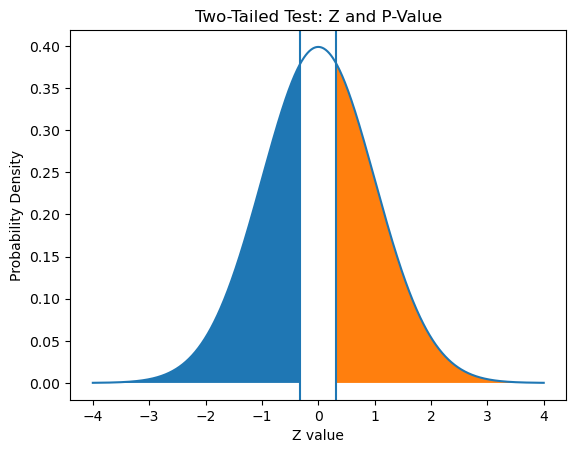

In [26]:
# ---------------------------------------------
# Visualization: Normal distribution and p-value
# ---------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.figure()
plt.plot(x, y)

# Shade rejection regions
plt.fill_between(x, y, where=(x <= -abs(z_statistic)))
plt.fill_between(x, y, where=(x >= abs(z_statistic)))

plt.axvline(z_statistic)
plt.axvline(-z_statistic)

plt.title("Two-Tailed Test: Z and P-Value")
plt.xlabel("Z value")
plt.ylabel("Probability Density")

plt.show()


### How Z and the P-Value Relate

When performing a hypothesis test, we first compute the Z-statistic.

The Z-statistic answers:

> "How many standard errors away from the expected value is the observed difference?"

Once we have the Z value, we look at the standard normal distribution 
and ask:

> "If the campaigns were truly equal, what is the probability of observing 
a difference at least this large purely by chance?"

This probability is the **p-value**.

The p-value corresponds to the total area in the two extreme tails 
of the normal distribution beyond ±Z.

The farther the Z-statistic is from zero, the smaller the tail areas, 
and therefore, the smaller the p-value.

A small p-value indicates that the observed difference is unlikely 
to have occurred due to random sampling variation alone.


### P-value meaning

What does this P-value = 0.75  mean?
If the campaigns were truly identical, there would be a 75% probability of observing a difference in conversion rates of 0.5% between them purely due to random sampling variation.